<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETE_Airline_Satisfaction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 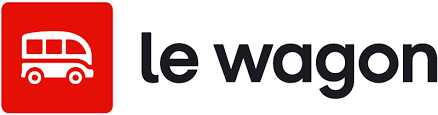

# Predicting airline satisfaction!


In this exercise we are going to try another classification task and predict the satisfaction of an airline customer with their flight!

Run the cell below to load the data

In [2]:
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/data-analytics/machine-learning/airline_satisfaction.csv"

airline_df = pd.read_csv(url)

airline_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Start by investigating the dataset

- How many columns / rows do we have?
- What are our targets / features?
- What kind of data are our features?
- Look at the target, what classification task are we going to be doing?
- Do we have any missing data?

In [3]:
# Display data types for each column #
print(airline_df.dtypes)


Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [4]:
# Check for missing data #
missing_data = airline_df.isnull().sum()
print(missing_data)


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Our target and some of our features are not yet ready to be used in a model.

Start by removing any columns that you think are unnecessary:

<details>
    <summary><i>Answer:</i></summary>
     
The 'Unnamed: 0' column is a hangover from excel, we can remove this.

Also, the 'id' column will not provide any info that is relevant to our model so this can be removed.
</details>       

In [5]:
# Drop the 'Unnamed: 0' and 'id' columns #
airline_df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)


We have *missing data* in one of our columns! Fill in the missing values with the median value of the column

<details>
    <summary><i>Hint:</i></summary>
     
Remember to use the `.fillna()` method of your dataframe.

You can use `.median()` method of a pandas series to get the median value
</details>    

In [8]:
# Calculate the median value of the column #
median_arrival_delay = airline_df['Arrival Delay in Minutes'].median()

# Replace missing values with the median #
airline_df['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)

print(airline_df.head())



   Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                

Now we need to get our **target** ready!

Encode the target variable below and save it as 'airline_target'

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder #
label_encoder = LabelEncoder()

# Fit and transform the target variable #
airline_target = label_encoder.fit_transform(airline_df['satisfaction'])

# Check the encoded target variable #
print(airline_target)


[0 0 1 ... 0 0 0]


We have to split our dataset now. Choose a split of 80/20.

In [17]:
# Define features (X) and target variable (y) #
X = airline_df.drop(columns=['satisfaction'])
y = airline_target

# Split the dataset into training and testing sets (80/20 split) #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets #
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (83123, 22)
Shape of X_test: (20781, 22)
Shape of y_train: (83123,)
Shape of y_test: (20781,)


Next step is to preprocess our data.
Let's deal with the categorical features in our dataset first.

A number of these contain string labels that must be transformed into numeric values so that they can be understood by the model that we end up training.

Encode the following columns `['Gender', 'Customer Type', 'Type of Travel', 'Class']` as a dataframe called 'cat_features'. Consider trying to use sklearn's `OneHotEncoder` to do this!


<details>
    <summary><i>Hint 1:</i></summary>

Be sure to check how many labels each column has. If any columns are binary, you can use the parameter `drop='if_binary'` in your One Hot Encoder to preserve only one column if there are two labels.

Remember, if there are only two labels, the two columns produced by the encoder will be the inverse of each other and hence contain the same information!
</details>  

<details>
    <summary><i>Hint 2:</i></summary>

If the output of your One Hot Encoder doesn't look right, check the 'sparse_output' parameter of your encoder.
</details>  


<details>
    <summary><i>Hint 3:</i></summary>

You can extract the names for your columns with the `.get_feature_names_out()` method of your One Hot Encoder.
</details>

Aide Mommoire: To encode categorical features using OneHotEncoder, you can follow these steps:

1.Select the categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class'].
2.   Use OneHotEncoder to transform these categorical columns.
3.   Use the fit_transform() method to fit the encoder to your training data and transform it.
4.  Extract the feature names using the get_feature_names_out() method of the encoder.
5. Create a DataFrame for the encoded categorical features using the transformed data and the extracted feature names.


In [27]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns #
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Initialize OneHotEncoder #
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

# Fit and transform the training data #
cat_features_encoded = encoder.fit_transform(X_train[cat_columns])

# Get feature names for encoded columns #
encoded_columns = encoder.get_feature_names_out(cat_columns)

# Create DataFrame for encoded categorical features #
cat_features = pd.DataFrame(cat_features_encoded, columns=encoded_columns)


Next we will address the numeric features in our dataset.

Create dataframes that contains the normalized numeric features.

<details>
    <summary><i>Hint 1:</i></summary>

Remember that you can use `.select_dtypes()` to select only columns of a specific data type from a dataframe!
</details>  


Aide Memoire:

To create a dataframe containing the normalized numeric features, you can follow these steps:


1.   Select only the numeric columns from your dataframe using the select_dtypes method.
2.   Normalize the selected numeric columns using a scaler, such as MinMaxScaler or StandardScaler.
3. Convert the normalized array back into a dataframe.
4. Optionally, concatenate this dataframe with any categorical features or other dataframes.


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns #
numeric_features = airline_df.select_dtypes(include=['int64', 'float64'])

# Initialize MinMaxScaler #
scaler = MinMaxScaler()

# Normalize numeric features #
normalized_numeric_features = scaler.fit_transform(numeric_features)

# Convert to dataframe #
normalized_numeric_df = pd.DataFrame(normalized_numeric_features, columns=numeric_features.columns)

# Display the normalized numeric dataframe #
print(normalized_numeric_df)



             Age  Flight Distance  Inflight wifi service  \
0       0.076923         0.086632                    0.6   
1       0.230769         0.041195                    0.6   
2       0.243590         0.224354                    0.4   
3       0.230769         0.107229                    0.4   
4       0.692308         0.036955                    0.6   
...          ...              ...                    ...   
103899  0.205128         0.032512                    0.4   
103900  0.538462         0.467690                    0.8   
103901  0.294872         0.396607                    0.2   
103902  0.192308         0.195679                    0.2   
103903  0.256410         0.341680                    0.2   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                     0.8                     0.6   
1                                     0.4                     0.6   
2                                     0.4                     0.4   
3  

Now that we have processed our numeric and cateogrical features, let's combine them back into one variable called 'X_train_preprocessed' and 'X_test_preprocessed' that contains **all** of our **preprocessed features** for each train and test data.

<details>
    <summary><i>Hint 1:</i></summary>

`pd.concat()` (The 'axis' parameter is important!)
</details>  

I need to preprocess my Train data

In [32]:
# Import necessary libraries #
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Select categorical columns #
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Initialize OneHotEncoder #
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

# Fit and transform the testing data #
cat_features_encoded_test = encoder.fit_transform(X_test[cat_columns])

# Get feature names for encoded columns #
encoded_columns_test = encoder.get_feature_names_out(cat_columns)

# Create DataFrame for encoded categorical features #
cat_features_test = pd.DataFrame(cat_features_encoded_test, columns=encoded_columns_test)

# Select only numeric columns #
numeric_features_test = X_test.select_dtypes(include=['int64', 'float64'])

# Initialize MinMaxScaler #
scaler = MinMaxScaler()

# Normalize numeric features #
normalized_numeric_features_test = scaler.fit_transform(numeric_features_test)

# Convert to DataFrame #
normalized_numeric_df_test = pd.DataFrame(normalized_numeric_features_test, columns=numeric_features_test.columns)

# Combine preprocessed numeric and categorical features for test data #
X_test_preprocessed = pd.concat([normalized_numeric_df_test, cat_features_test], axis=1)

# Display the preprocessed testing data #
print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)


Shape of X_test_preprocessed: (20781, 24)


Well done! That's our preprocessing done. It's not a super quick processes, but it is **very** important.

Now, let's create our models.

We will start with a simple classifier. Train a logistic regression model on your train data. Then evaluate it's accuracy score on your test data!

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define categorical and numeric columns #
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
num_columns = airline_df.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps for categorical and numeric features #
cat_preprocessor = OneHotEncoder(drop='if_binary')
num_preprocessor = SimpleImputer(strategy='mean')

# Combine preprocessing steps for all features #
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, cat_columns),
    ('num', num_preprocessor, num_columns)
])

# Define the logistic regression model #
logistic_regression_model = LogisticRegression()

# Create a pipeline with preprocessing and modeling steps #
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', logistic_regression_model)
])

# Split the dataset into training and testing sets (80/20 split) #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data #
pipeline.fit(X_train, y_train)

# Predict the target values for the test data #
y_pred_test = pipeline.predict(X_test)

# Calculate the accuracy score of the model on the test data #
accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy score #
print("Accuracy score on test data:", accuracy)




Accuracy score on test data: 0.8250806024734132


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88% accuracy isn't bad, but maybe we can do better...

Let's try using a more complex model on our preprocessed data. A [random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) might be a good alternative choice.

<details>
<summary><i>Note</i></summary>

Random Forest models reduce overfitting by averaging multiple decision trees and is less sensitive to noise and outliers in the data.
</details>

Try instantiating and fitting a random forest classifier model with the same data as above and compare the accuracy scores.

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier model #
random_forest_model = RandomForestClassifier(random_state=42)

# Create a new pipeline with preprocessing and the random forest model #
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', random_forest_model)
])

# Fit the pipeline (preprocessing + model) on the training data #
random_forest_pipeline.fit(X_train, y_train)

# Predict the target values for the test data #
y_pred_test_rf = random_forest_pipeline.predict(X_test)

# Calculate the accuracy score of the model on the test data #
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

# Print the accuracy score #
print("Accuracy score on test data (Random Forest):", accuracy_rf)


Accuracy score on test data (Random Forest): 0.9608296039651605


Your random forest classifier should have an **accuracy score of around 0.96**, which is a substantial improvement on the simple model we ran earlier!

Certain models will peform better than other dependent on your data. Knowing which one to use intuitively is a matter of practice. For example, random forest models are good for data that is *non-linear* in nature.

[Here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) is a list of classifiers available on sklearn. The explanatory documentation is a fanstastic resource.

*In the cell below pick one of the models in the documentation and use it to predict airline customer satisfaction!*

Finally, remember that **preprocessing is integral to the analysis pipeline**. A model will only return quality output **if the input is also quality**, so expect to always spend a decent amount of time on cleaning / encoding / feature engineering!

To run the Gaussian Naive Bayes I had to use the same coding workaround as for the Logisic Regression.

1.   Define Preprocessing Steps: Define preprocessing steps for both categorical and numeric features.
2.   Combine Preprocessing Steps: Combine the preprocessing steps into a single ColumnTransformer.
3.  Create Pipeline: Create a pipeline with preprocessing and modeling steps, using the AdaBoost classifier.
4.  Split Data: Split the dataset into training and testing sets.
5.  Fit Pipeline: Fit the pipeline on the training data.
6.  Predict and Evaluate: Predict the target values for the test data and evaluate the model's accuracy.List item

    


In [52]:
from sklearn.impute import SimpleImputer #

# Initialize SimpleImputer #
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the preprocessed training data #
X_train_imputed = imputer.fit_transform(X_train_preprocessed)

# Transform the preprocessed test data using the fitted imputer #
X_test_imputed = imputer.transform(X_test_preprocessed)






In [54]:
import numpy as np

# Check for NaN values in the training data #
print("NaN values in training data:")
print(np.isnan(X_train_imputed).sum())

# Check for NaN values in the test data #
print("\nNaN values in test data:")
print(np.isnan(X_test_imputed).sum())



NaN values in training data:
0

NaN values in test data:
0


In [55]:
import pandas as pd

# Convert the numpy arrays back into pandas DataFrames #
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train_preprocessed.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test_preprocessed.columns)

# Check for NaN values in the training data #
print("NaN values in training data:")
print(X_train_imputed_df.isnull().sum())

# Check for NaN values in the test data #
print("\nNaN values in test data:")
print(X_test_imputed_df.isnull().sum())


NaN values in training data:
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Customer Type_disloyal Customer      0
Type of Travel_Personal Travel       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

NaN values in test da

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define categorical and numeric columns #
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
num_columns = airline_df.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps for categorical and numeric features #
cat_preprocessor = OneHotEncoder(drop='if_binary')
num_preprocessor = SimpleImputer(strategy='mean')

# Combine preprocessing steps for all features #
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, cat_columns),
    ('num', num_preprocessor, num_columns)
])

# Define the Gaussian Naive Bayes model #
gnb = GaussianNB()

# Create a pipeline with preprocessing and modeling steps #
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gnb)
])

# Split the dataset into training and testing sets (80/20 split) #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data #
pipeline.fit(X_train, y_train)

# Predict the target values for the test data #
y_pred_test = pipeline.predict(X_test)

# Calculate the accuracy score of the model on the test data #
accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy score #
print("Accuracy score on test data (Gaussian Naive Bayes):", accuracy)




Accuracy score on test data (Gaussian Naive Bayes): 0.8496703719743997


And for the ADA Boost.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Define categorical and numeric columns #
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
num_columns = airline_df.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps for categorical and numeric features #
cat_preprocessor = OneHotEncoder(drop='if_binary')
num_preprocessor = SimpleImputer(strategy='mean')

# Combine preprocessing steps for all features #
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, cat_columns),
    ('num', num_preprocessor, num_columns)
])

# Define the AdaBoost classifier #
adaboost = AdaBoostClassifier()

# Create a pipeline with preprocessing and modeling steps #
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', adaboost)
])

# Split the dataset into training and testing sets (80/20 split) #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data #
pipeline.fit(X_train, y_train)

# Predict the target values for the test data #
y_pred_test = pipeline.predict(X_test)

# Calculate the accuracy score of the model on the test data #
accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy score #
print("Accuracy score on test data (AdaBoost):", accuracy)


Accuracy score on test data (AdaBoost): 0.927529955247582


And for the Decision Tree

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define categorical and numeric columns #
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
num_columns = airline_df.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps for categorical and numeric features #
cat_preprocessor = OneHotEncoder(drop='if_binary')
num_preprocessor = SimpleImputer(strategy='mean')

# Combine preprocessing steps for all features #
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, cat_columns),
    ('num', num_preprocessor, num_columns)
])

# Define the Decision Tree classifier #
decision_tree = DecisionTreeClassifier()

# Create a pipeline with preprocessing and modeling steps #
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', decision_tree)
])

# Split the dataset into training and testing sets (80/20 split) #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data #
pipeline.fit(X_train, y_train)

# Predict the target values for the test data #
y_pred_test = pipeline.predict(X_test)

# Calculate the accuracy score of the model on the test data #
accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy score #
print("Accuracy score on test data (Decision Tree):", accuracy)


Accuracy score on test data (Decision Tree): 0.9469707906260526


And for the Support Vector Machines (SVM)

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define categorical and numerical columns
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
num_columns = airline_df.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing steps for categorical and numerical features
cat_preprocessor = OneHotEncoder(drop='if_binary')
num_preprocessor = SimpleImputer(strategy='mean')

# Combine preprocessing steps for all features
preprocessor = ColumnTransformer([
    ('cat', cat_preprocessor, cat_columns),
    ('num', num_preprocessor, num_columns)
])

# Initialize the SVM classifier
svm_classifier = SVC()

# Create a pipeline with preprocessing and the SVM classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', svm_classifier)
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + model) on the training data
pipeline.fit(X_train, y_train)

# Predict the target values for the test data
y_pred_test = pipeline.predict(X_test)

# Calculate the accuracy score of the model on the test data
accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy score
print("Accuracy score on test data (SVM):", accuracy)


Accuracy score on test data (SVM): 0.668880227130552
